<b>Task 1 - Framing the Assignment</b>

The objective of this assignment is to figure out how certain factors can increase or decrease a person's chance of surviving the Titanic shipwreck. The factors include: whether the person is from the Upper, Middle, or Lower class, the gender of the passenger, the age in years of the passenger, the number of siblings and spouses the passenger has, the number or parents and children the passenger has aboard the Titanic, the ticket number, the passenger fare, the cabin number and where they embarked on the Titanic. The final output for submission should be the passenger ID and a 0 or 1 afterwards to show if the passenger will survive or not. The models used for ML will be the naive bayes classifier and perceptron.

<b>Importing the test and training the data </b>

We are importing the data, and ensuring figures being generated are saved into the same folder as a png

In [1]:
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

#When we want to save figures generated by our code, we save them under "png" type under our "images path"
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [2]:
import os
import pandas as pd

"Here is where we store our repo for this project"
DOWNLOAD_ROOT = "http://raw.githubusercontent.com/Paulywhirl/cs4442_asn2/master"
DATA_PATH = os.path.join("data")

#Method to fetch the train data to be used 
def fetch_train_data(data_path=DATA_PATH):
        csv_path = os.path.join(data_path, "train.csv")
        return pd.read_csv(csv_path)

#Method to fetch the test data to be used
def fetch_test_data(data_path=DATA_PATH):
        csv_path = os.path.join(data_path, "test.csv")
        return pd.read_csv(csv_path)


<b>Storing the test and train data and displaying information about it </b>

We stored the train data under the variable train and the test data under the variable test. We display a sample of what each data looks like as well as get info on the information itself, the number of null elements and statistics. Histograms are also made to display the frequency of the train data to help us analyze the data.

In [3]:
#Let's create meaningful names for our data
train = fetch_train_data()
test = fetch_test_data()

#Confirm the data is as we provided
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
#Let's get some info from our train data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 27.8+ KB


In [7]:
#Let's find out where we can find null values
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [9]:
#Let's get some statistics about our train data
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


Saving figure train_attribute_histogram_plots


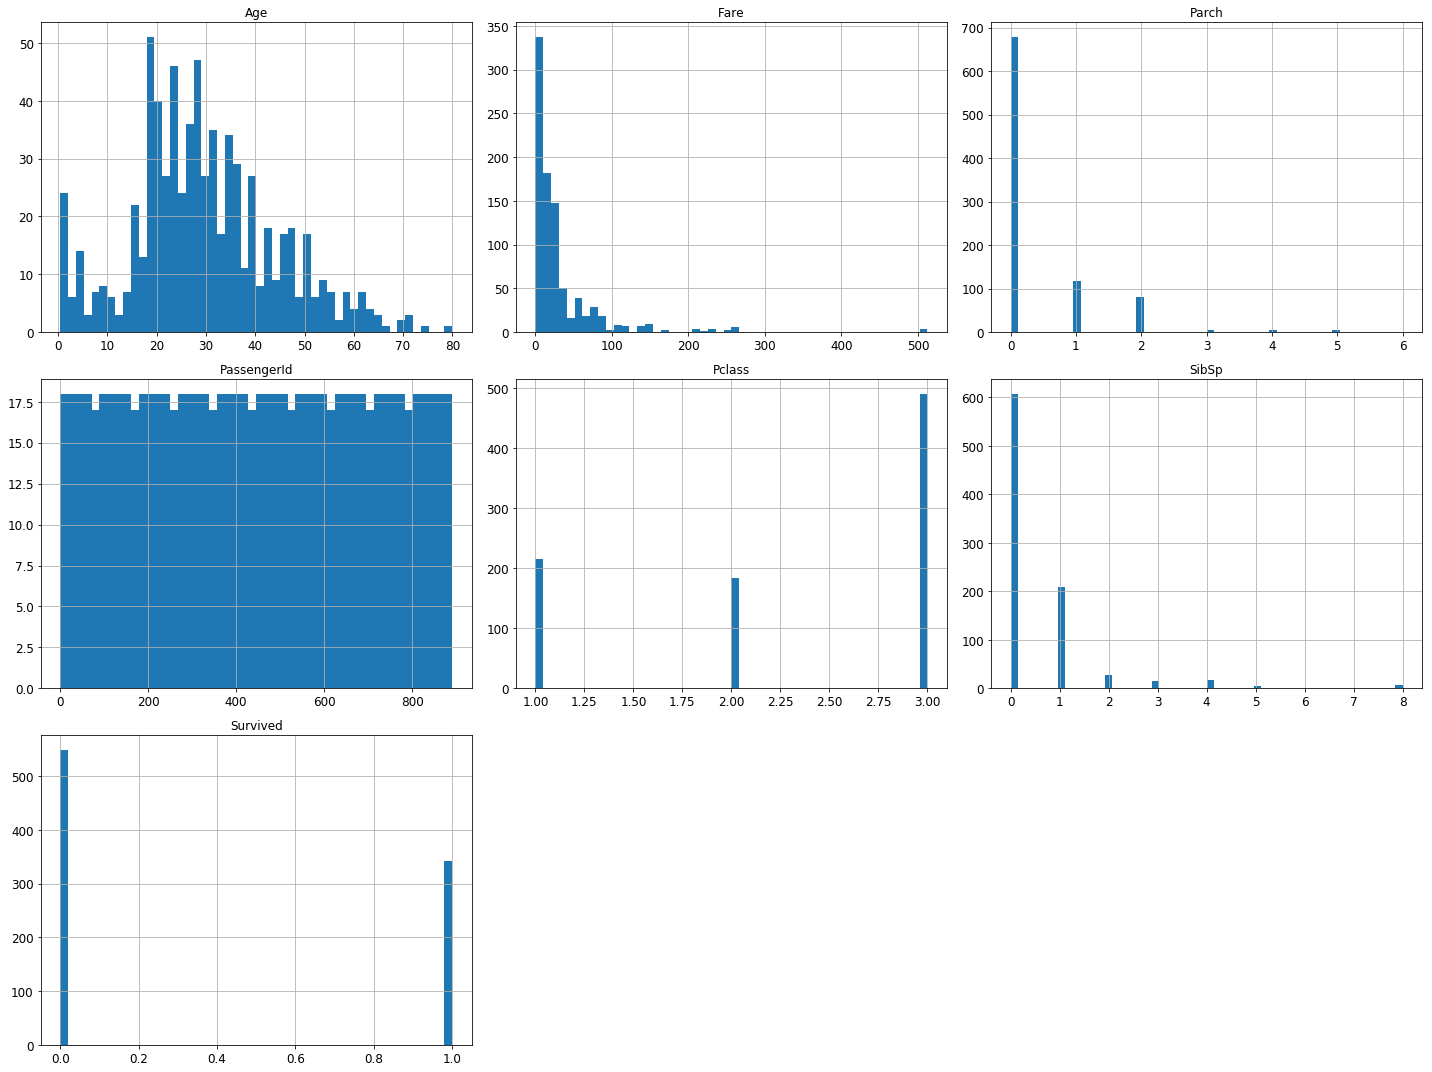

In [11]:
#Let's view some graphs to get a better idea of the data we have provided
#Figures in terms of histograms for each variable
import matplotlib.pyplot as plt
train.hist(bins=50, figsize=(20,15))
save_fig("train_attribute_histogram_plots")
plt.show()

In [12]:
np.random.seed(42)

In [13]:
#Separated data based on survivors/non-survivors
survivalData = train.loc[train['Survived'] == 1]
deadData = train.loc[train['Survived'] == 0]

In [14]:
#Get correlation behind the train data
corr_matrix = train.corr()

In [15]:
#Sort through the correlation matrix
corr_matrix["Survived"].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

Saving figure scatter_matrix_plot


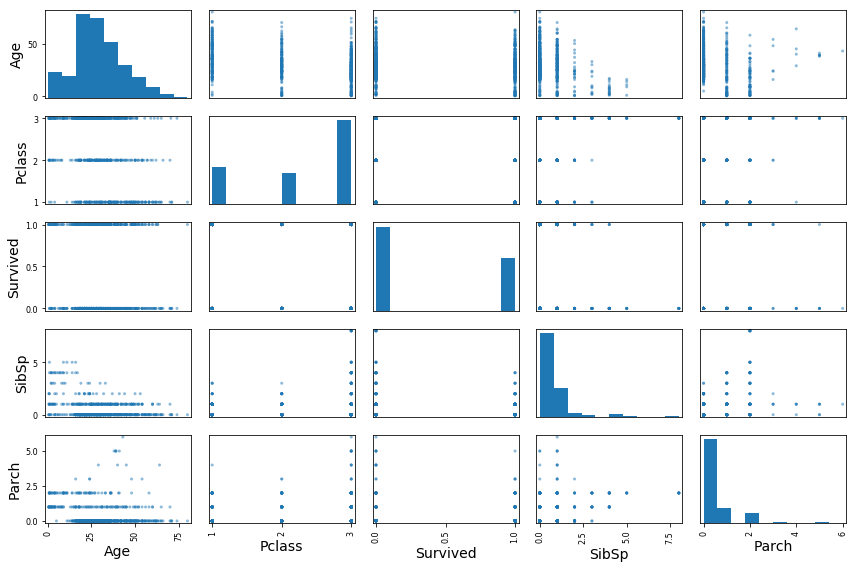

In [16]:
from pandas.plotting import scatter_matrix

#Create some more visuals based on meaningful variables
attributes = ["Age", "Sex", "Pclass", "Survived", "SibSp", "Parch"]
#Scatter plots to show distribution of data
scatter_matrix(train[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")

Saving figure scatter_matrix_plot


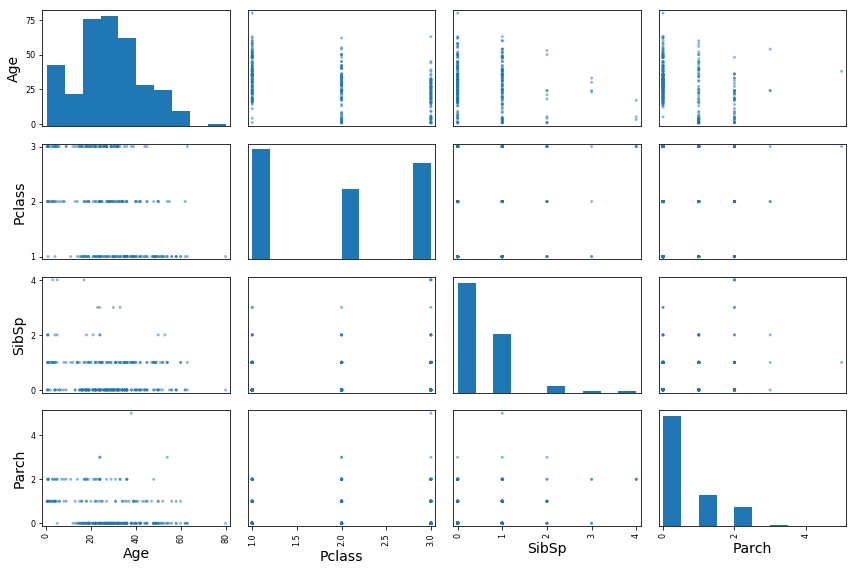

In [17]:
from pandas.plotting import scatter_matrix

#Scatter plots to show how they different with just the survival data
attributes = ["Age", "Sex", "Pclass", "SibSp", "Parch"]
scatter_matrix(survivalData[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")

Saving figure scatter_matrix_plot_non_survived


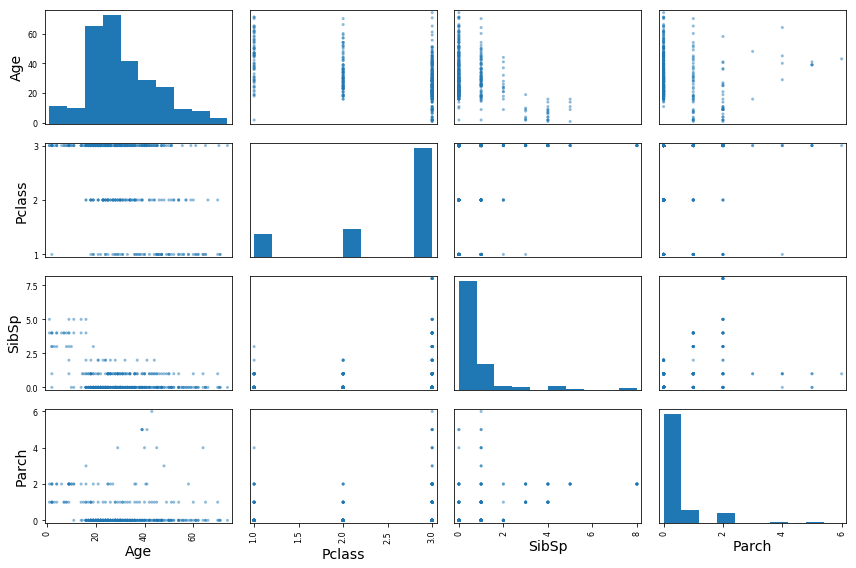

In [18]:
from pandas.plotting import scatter_matrix

#Scatter plots to show how they different with just the survival data
attributes = ["Age", "Sex", "Pclass", "SibSp", "Parch"]
scatter_matrix(deadData[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot_non_survived")

Saving figure Age Distribution of Survivors


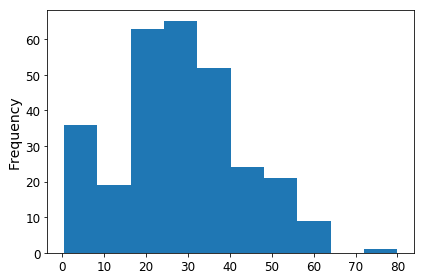

In [19]:
survivalData["Age"].plot(kind="hist")
save_fig("Age Distribution of Survivors")

Saving figure Odds of living based on Spouses and Siblings


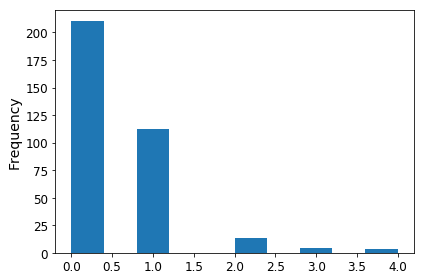

In [20]:
survivalData["SibSp"].plot(kind="hist")
save_fig("Odds of living based on Spouses and Siblings")

Saving figure Odds of living based on Parents and Children


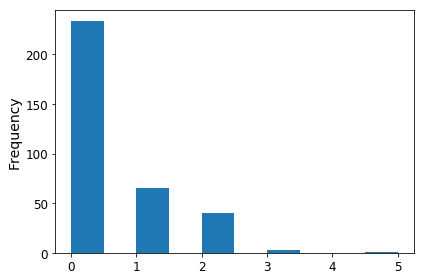

In [21]:
survivalData["Parch"].plot(kind="hist")
save_fig("Odds of living based on Parents and Children")

Saving figure Odds of living based on Pclass


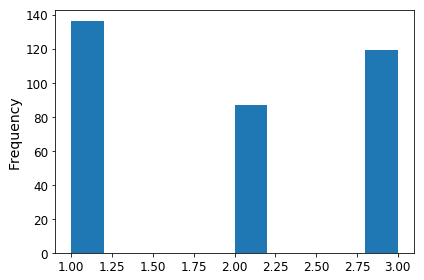

In [22]:
survivalData["Pclass"].plot(kind="hist")
save_fig("Odds of living based on Pclass")

Text(0.5, 1.0, 'Sex: Survived vs Dead')

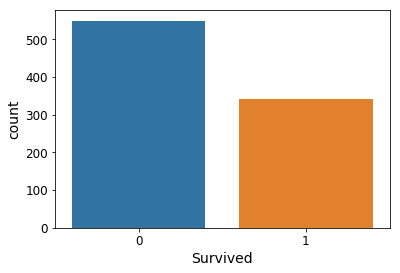

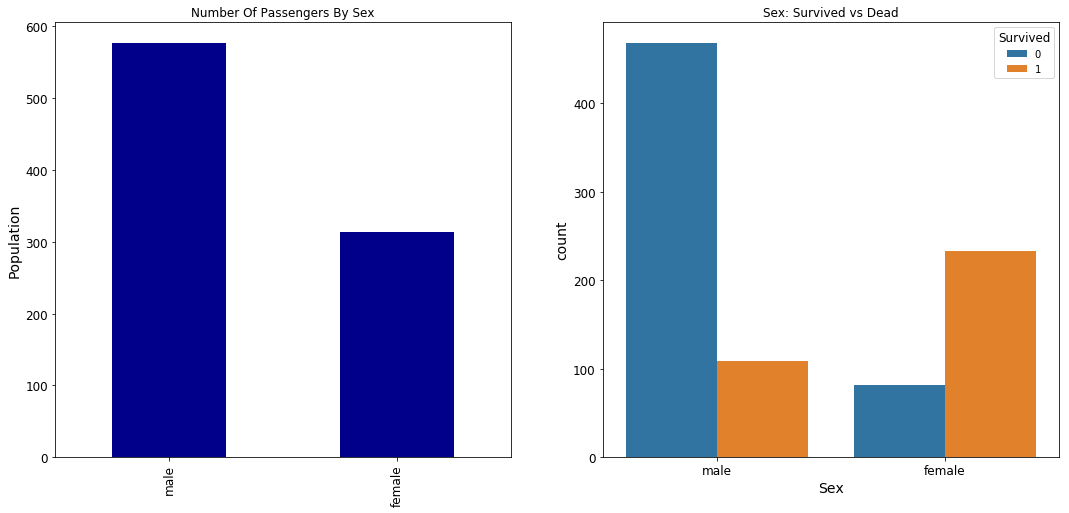

In [26]:
import seaborn as sns

#Visuals to show the difference of survival and non-survival for males vs women
sns.countplot("Survived", data = train)
fig, ax = plt.subplots(1, 2, figsize = (18, 8))
train["Sex"].value_counts().plot.bar(color = "darkblue", ax = ax[0])
ax[0].set_title("Number Of Passengers By Sex")
ax[0].set_ylabel("Population")
sns.countplot("Sex", hue = "Survived", data = train, ax = ax[1])
ax[1].set_title("Sex: Survived vs Dead")

In [27]:
#Data cleaning and fine tuning
train_fix = train.drop(["Name", "Cabin", "Ticket", "PassengerId"], axis=1)
test_fix = test.drop(["Name", "Cabin", "Ticket", "PassengerId"], axis=1)
train_fix.Sex = train_fix.Sex.map({'female':0, 'male':1})
test_fix.Sex = test_fix.Sex.map({'female':0, 'male':1})
mean = test_fix.Age.mean()
test_fix.Age.fillna(mean,inplace=True)
mean = test_fix.Fare.mean()
test_fix.Fare.fillna(mean,inplace=True)
mode = test_fix.Sex.mode()
test_fix.Sex.fillna(mode,inplace=True)
mean = train_fix.Age.mean()
train_fix.Age.fillna(mean,inplace=True)
mean = train_fix.Fare.mean()
train_fix.Fare.fillna(mean,inplace=True)
mode = train_fix.Sex.mode()
train_fix.Sex.fillna(mode,inplace=True)

#Emarked data for train
train_fix.Embarked = train_fix.Embarked.map({'S':0, 'C':1, 'Q':2})
mean = train_fix.Embarked.mean()
train_fix.Embarked.fillna(mean, inplace=True)

#Emarked data for test
test_fix.Embarked = test_fix.Embarked.map({'S':0, 'C':1, 'Q':2})
mean = test_fix.Embarked.mean()
test_fix.Embarked.fillna(mean, inplace=True)

#Fix Age groupings for train
train_fix.loc[ train_fix['Age'] <= 18, 'Age'] = 0
train_fix.loc[ (train_fix['Age'] > 18) & (train_fix['Age'] <= 30), 'Age'] = 1
train_fix.loc[ (train_fix['Age'] > 30) & (train_fix['Age'] <= 45), 'Age'] = 2
train_fix.loc[ (train_fix['Age'] > 45) & (train_fix['Age'] <= 65), 'Age'] = 3
train_fix.loc[ train_fix['Age'] > 65, 'Age'] = 4
train_fix['Age'] = train_fix['Age'].astype(int)

#Fix Age groupings for test
test_fix.loc[ test_fix['Age'] <= 18, 'Age'] = 0
test_fix.loc[ (test_fix['Age'] > 18) & (test_fix['Age'] <= 30), 'Age'] = 1
test_fix.loc[ (test_fix['Age'] > 30) & (test_fix['Age'] <= 45), 'Age'] = 2
test_fix.loc[ (test_fix['Age'] > 45) & (test_fix['Age'] <= 65), 'Age'] = 3
test_fix.loc[ test_fix['Age'] > 65, 'Age'] = 4
test_fix['Age'] = test_fix['Age'].astype(int)

<b>Naive Bayes Classifier Model</b>

We applied the prepared training data to the GaussianNB function in sklearn then we had it predict the survivability of the passengers with the cleaned test data.

In [24]:
from sklearn.naive_bayes import GaussianNB

#Create our naive bayes model and 'train' model
gnb = GaussianNB()
X = train_fix.drop(["Survived"], axis=1)
gnb.fit(X, train["Survived"])

NameError: name 'train_fix' is not defined

In [ ]:
#Based on our training set, we can predict the survival rate of our test data
predictionLR = gnb.predict(test_fix)
predictionLR = pd.DataFrame(predictionLR)
predictionLR.columns = ['Survived']
testr = pd.concat([test_fix,predictionLR], axis=1)
testr['Survived'] = testr['Survived'].astype(int)
testr.head()
print(predictionLR)

In [ ]:

test = pd.read_csv('./data/test.csv')
test = pd.concat([test, predictionLR], axis=1)
test.head()

In [ ]:
#Add our test prediction to a csv file for submitting
my_submission = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': test.Survived})
my_submission.to_csv('submission_gnb.csv', index=False)

<b>Perceptron Model</b>

We applied the prepared training data to the Perceptron function in sklearn then we had it predict the survivability of the passengers with the cleaned test data.

In [ ]:
from sklearn.linear_model import Perceptron

#Perform calculations for the Perceptron model
pmod = Perceptron(max_iter=50, random_state=10, n_jobs=-1)

In [ ]:
#Create our paramters for the perceptron model
#target: matrix of values based on "Survive"
#features: numpy array/target values
target = train_fix["Survived"].values
features = train_fix[cols].values

In [ ]:
pmod.fit(features, target)

In [ ]:
pmod.score(features, target)